# Framingham Heart Study #

- Contributors: Chaitanya Pasupala, Lucie Schulz
- Submission Date: Dec. 20th 2022
- Project page https://github.com/Luc1eSky/Framingham_Heart_Study

**Abstract:** The aim of this analysis is to fit a binary logistic regression machine learning model that predicts whether or not a person is likely to develop a coronary heart disease in the next 10 years, followed by understanding the influence of significant factors that truly affect them. The trained model is then tested against unseen test data to evaluate the model.

### Scope of study
1. Exploratory Analysis
2. Data Cleaning to prepare data set for analysis
3. Plots of various independent variables to understand the dataset and data patterns.
4. Implement Logistic Regression, Logit Model to explain the marginal effects of various variables on the probability of occurence of Coronary Heart Disease after 10 years.
5. Prediction: Confusion matrix with lowest false positives and false negatives.

### Info about Dataset ###
The dataset is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The dataset provides the patients’ information and includes 4,238 records,16 columns and 15 attributes.

**Demographic:**
- Sex: male or female (Nominal).
- Age: Age of the patient (Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous).

**Behavioral**
- Education: 0: Less than High School and High School degrees, 1: College Degree and Higher. 
- Current Smoker: whether or not the patient is a current smoker (Nominal).
- Cigs Per Day: the number of cigarettes that the person smoked on average in one day. (can be considered continuous as one can have any number of cigarettes, even half a cigarette.)

**Medical (binary variables)**
- BP Meds: whether or not the patient was on blood pressure medication.
- Prevalent Stroke: whether or not the patient had previously had a stroke.
- Prevalent Hyp: whether or not the patient was hypertensive.
- Diabetes: whether or not the patient has diabetes.

**Medical (continuous variables)**
- Tot Chol: total cholesterol level.
- Sys BP: systolic blood pressure.
- Dia BP: diastolic blood pressure.
- BMI: Body Mass Index.
- Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)
- Glucose: glucose level

**Predict variable (desired target variable)**
- 10 year risk of coronary heart disease CHD (binary: “1” - “Yes”, “0” - “No”).

### Data and Library Import

In [79]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import optimize
import statsmodels.api as sm

In [80]:
# read in the data
framingham_data = pd.read_csv('framingham.csv')

## 1. Exploratory Data Analysis ##

In [81]:
framingham_data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [82]:
framingham_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [83]:
len(framingham_data)

4238

In [84]:
framingham_data['TenYearCHD'].value_counts(normalize=True)

0    0.848042
1    0.151958
Name: TenYearCHD, dtype: float64

**In the data set, the share of patients who did not develop a heart disease is 84.8% and share of those who did is 15.2%. The imbalance in the data is a matter of concern. A Weighted Logistic Regression is also used to compensate the imbalance.**

In [85]:
# information about the dataset
vital_stats = framingham_data.describe().T
vital_stats['NaN'] = framingham_data.isna().sum()
vital_stats

,count,mean,std,min,25%,50%,75%,max,NaN
male,4238.0,0.429212,0.495022,0.00,0.00,0.0,1.000,1.0,0
age,4238.0,49.584946,8.572160,32.00,42.00,49.0,56.000,70.0,0
education,4133.0,1.978950,1.019791,1.00,1.00,2.0,3.000,4.0,105
currentSmoker,4238.0,0.494101,0.500024,0.00,0.00,0.0,1.000,1.0,0
cigsPerDay,4209.0,9.003089,11.920094,0.00,0.00,0.0,20.000,70.0,29
BPMeds,4185.0,0.029630,0.169584,0.00,0.00,0.0,0.000,1.0,53
prevalentStroke,4238.0,0.005899,0.076587,0.00,0.00,0.0,0.000,1.0,0
prevalentHyp,4238.0,0.310524,0.462763,0.00,0.00,0.0,1.000,1.0,0
diabetes,4238.0,0.025720,0.158316,0.00,0.00,0.0,0.000,1.0,0
totChol,4188.0,236.721585,44.590334,107.00,206.00,234.0,263.000,696.0,50


## 2. Data Preparation & Cleaning ##

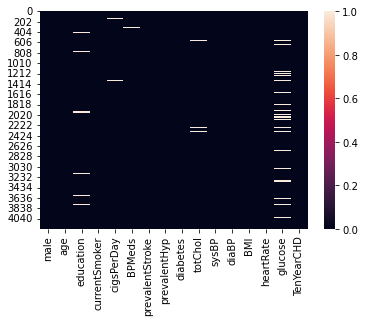

In [86]:
# visualize null values
sns.heatmap(framingham_data.isna())
plt.show()

**As can be seen from above, out of 15 covariates, 
7 covariates (education,cigsPerDay,BPMeds,totChol,BMI, heartRate, and glucose) have NaN values.**

**Here, we use linear regression to estimate the missing values using the data from the columns that do not have any missing values.**

In [87]:
# Use other covariates to regress and replace missing NaN values
# How we go about - 
# 1. Regress columns that have missing values over those that do not have missing values.
# 2. If the non-NaN columns have good predictions (check r-squared for goodness of fit), we replace
# NaN values using the predicted values.
# 3. If the prediction is not good, figure out some other way like replace with mean or mode
# 4. Also, we make sure that we dont make use of the 'outcome' column as covariate in regression.

# Create a copy of the original dataframe to work on regression

new_fd = pd.DataFrame(framingham_data.drop(columns=['TenYearCHD']))

# Remove all rows with NaN values. This will be the non-NaN training data subset
training_data = new_fd[~new_fd.isnull().any(axis=1)]

# Find the columns that have NaN values
na_columns = new_fd.columns[new_fd.isna().any()]

# Create a dictionary to store the results of regression predictions
predicted_values = {}

# Loop over each of the columns that contains NaN values
for column in na_columns:
    
    Y = training_data[column].to_numpy()
    
    X = training_data.drop(columns=na_columns).to_numpy()
    
    model = sm.OLS(Y,X,missing='raise').fit()
    
    print(column,'\t\t', model.rsquared)
    
    Y = model.predict(new_fd.drop(columns=na_columns).to_numpy())
    
    # Save the predicted values in the dictionary.
    predicted_values.update({column:Y.copy()})
    
# Based on the R-squared, we check the goodness of fit and take a decision on the substitution of NaNs

education 		 0.7791630010172367
cigsPerDay 		 0.7655084829161867
BPMeds 		 0.11844187421567065
totChol 		 0.966716474093699
BMI 		 0.9763742633613963
heartRate 		 0.971007124730545
glucose 		 0.9457709985869588


**It may be seen from the above that except BPMeds, the other 6 covariates have high R-squared values. For BPMeds, which is a categorical variable, we use mode to replace NaNs and for others, we use the linear regression predicted values to replace NaNs.**

In [88]:
# Using mode to replace NaNs for the variable 'BPMeds'.
bpmed_mode = framingham_data['BPMeds'].mode().values[0]
framingham_data['BPMeds'].fillna(bpmed_mode,inplace=True)

# Delete the linear regression predictions for the variable 'BPMeds'
predicted_values.pop('BPMeds')

# For other variables, use predicted values to replace NaNs
for key in predicted_values.keys():
    framingham_data[key].where(~framingham_data[key].isna(),predicted_values[key],inplace=True)

In [89]:
vital_stats = framingham_data.describe().T
vital_stats['NaN'] = framingham_data.isna().sum()
vital_stats

,count,mean,std,min,25%,50%,75%,max,NaN
male,4238.0,0.429212,0.495022,0.00,0.00,0.0,1.000,1.0,0
age,4238.0,49.584946,8.572160,32.00,42.00,49.0,56.000,70.0,0
education,4238.0,1.979291,1.007720,1.00,1.00,2.0,3.000,4.0,0
currentSmoker,4238.0,0.494101,0.500024,0.00,0.00,0.0,1.000,1.0,0
cigsPerDay,4238.0,9.065447,11.904332,0.00,0.00,0.0,20.000,70.0,0
BPMeds,4238.0,0.029259,0.168552,0.00,0.00,0.0,0.000,1.0,0
prevalentStroke,4238.0,0.005899,0.076587,0.00,0.00,0.0,0.000,1.0,0
prevalentHyp,4238.0,0.310524,0.462763,0.00,0.00,0.0,1.000,1.0,0
diabetes,4238.0,0.025720,0.158316,0.00,0.00,0.0,0.000,1.0,0
totChol,4238.0,236.805644,44.435167,107.00,206.00,234.0,263.000,696.0,0


In [90]:
framingham_data.insert(loc=0, column='intercept', value=1)
framingham_data["education"] = framingham_data["education"].apply(np.int64)
framingham_data.head()

,intercept,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,1,39,4,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,1,0,46,2,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,1,48,1,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,1,0,61,3,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,1,0,46,3,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


## 3. Data Visualizations ##

This section will give a visual overview of the patient information available in the data set to get a better understanding of the underlying data for the analysis

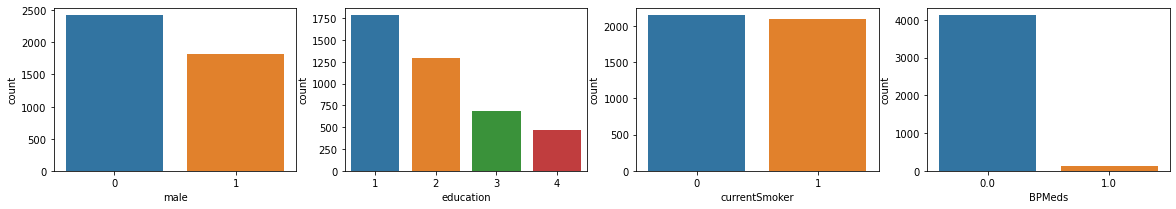

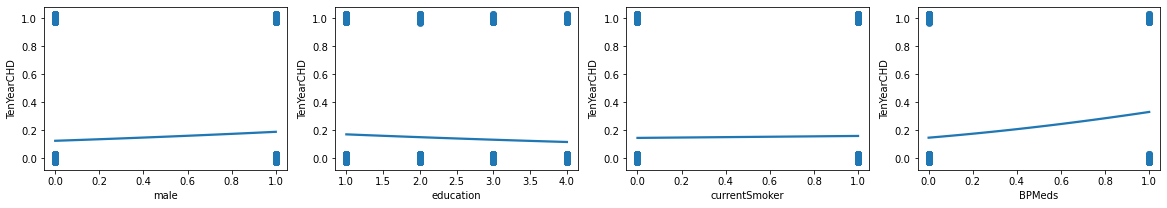

In [91]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, figsize=(20,3))
sns.countplot(x = 'male', data=framingham_data, ax=ax1)
sns.countplot(x = 'education', data=framingham_data, ax=ax2)
sns.countplot(x = 'currentSmoker', data=framingham_data, ax=ax3)
sns.countplot(x = 'BPMeds', data=framingham_data, ax=ax4)
plt.show()

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, figsize=(20,3))
sns.regplot(x = 'male', y = 'TenYearCHD', y_jitter = 0.03, data = framingham_data, logistic = True, ci = None, ax=ax1)
sns.regplot(x = 'education', y = 'TenYearCHD', y_jitter = 0.03, data = framingham_data, logistic = True, ci = None, ax=ax2)
sns.regplot(x = 'currentSmoker', y = 'TenYearCHD', y_jitter = 0.03, data = framingham_data, logistic = True, ci = None, ax=ax3)
sns.regplot(x = 'BPMeds', y = 'TenYearCHD', y_jitter = 0.03, data = framingham_data, logistic = True, ci = None, ax=ax4)
plt.show()

**Observations:**

We can initially fit a logistic regression line using seaborn’s regplot( ) function to visualize how the probability of developing CHD changes based on the different attributes of a patient. This type of plot is only possible when fitting a logistic regression using a single independent variable. The current plots give you an intuition of how the logistic model fits an ‘S’ curve line and how the probability changes from 0 to 1 with observed values. In the oncoming model fitting, we will train/fit a multiple logistic regression model, which includes multiple independent variables.

**Male:**
- The data set includes more females than males
- The logistic regression line shows that the risk of developing a heart disease is higher for males than females

**Education:**
- Shows the distribution of educational levels is decreasing, meaning less people in the survey have the highest level of education (seems similar to the distribution in the population)
- The logistic regression line shows that the risk of developing a heart disease decreases with a higher education level

**Current Smoker:**
- The data set is almost split 50/50 into smokers and non smokers
- The logistic regression line shows that the risk of developing a heart disease increases when being a smoker

**BP Meds:**
- The plot shows that only a small fraction of patients is currently prescribed Blood Pressure Medication
- The logistic regression line shows that the risk of developing a heart disease increases when taking meds against high blood pressure


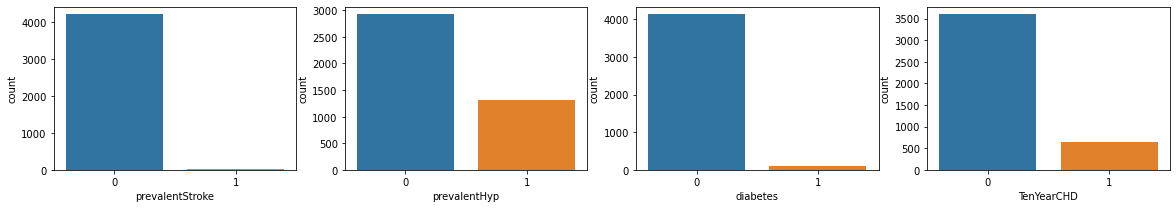

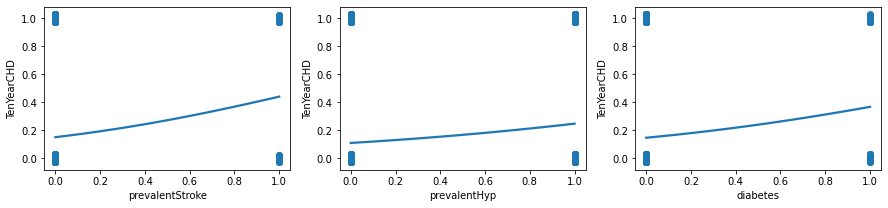

In [92]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, figsize=(20,3))
sns.countplot(x = 'prevalentStroke', data=framingham_data, ax=ax1)
sns.countplot(x = 'prevalentHyp', data=framingham_data, ax=ax2)
sns.countplot(x = 'diabetes', data=framingham_data, ax=ax3)
sns.countplot(x = 'TenYearCHD', data=framingham_data, ax=ax4)
plt.show()

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,3))
sns.regplot(x = 'prevalentStroke', y = 'TenYearCHD', y_jitter = 0.03, data = framingham_data, logistic = True, ci = None, ax=ax1)
sns.regplot(x = 'prevalentHyp', y = 'TenYearCHD', y_jitter = 0.03, data = framingham_data, logistic = True, ci = None, ax=ax2)
sns.regplot(x = 'diabetes', y = 'TenYearCHD', y_jitter = 0.03, data = framingham_data, logistic = True, ci = None, ax=ax3)
plt.show()

**Observations:**

**Prevalent Stroke:**
- Only a small subset of patients in the data had a stroke
- The logistic regression line shows that the risk of developing a heart disease increases when the patient had a stroke previously

**Prevalent Hypertension:**
- Around a third of the patients in the sample have diagnosed hypertension
- The logistic regression line shows that the risk of developing a heart disease increases with hypertension

**Diabetes:**
- Only a small percentage of patients in the data set have diabetes 
- The logistic regression line shows that the risk of developing a heart disease increases when having diabetes

**Ten Year CHD:**
- Shows that about 25% of patients develop a coronary heart disease withon 10 years

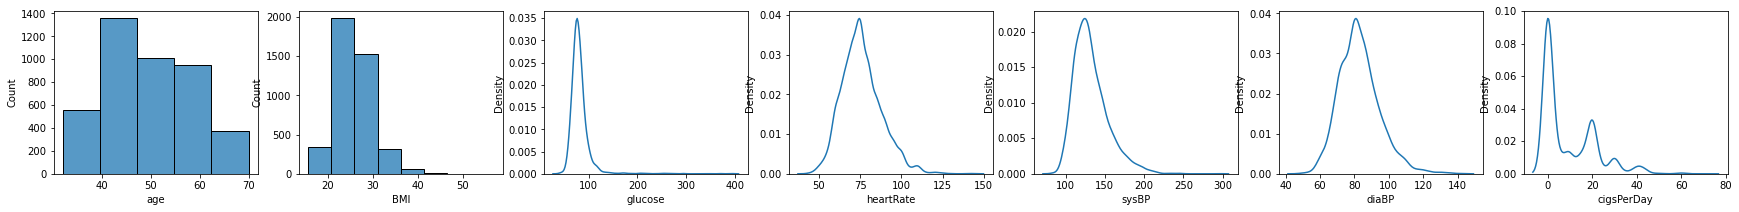

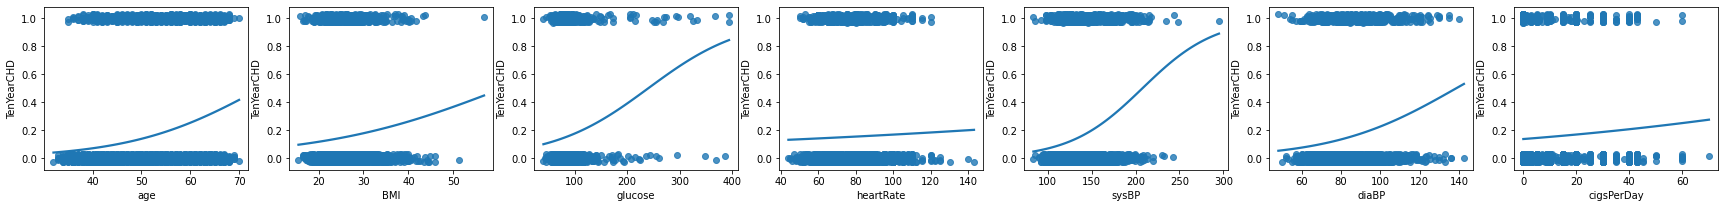

In [93]:
fig, (ax1, ax2, ax3, ax4, ax5, ax6, ax7) = plt.subplots(1,7, figsize=(30,3))
sns.histplot(x = 'age', data=framingham_data,bins=5, ax=ax1)
sns.histplot(x = 'BMI', data=framingham_data,bins=8, ax=ax2)
sns.kdeplot(framingham_data['glucose'], ax=ax3)
sns.kdeplot(framingham_data['heartRate'], ax=ax4)
sns.kdeplot(framingham_data['sysBP'], ax=ax5)
sns.kdeplot(framingham_data['diaBP'], ax=ax6)
sns.kdeplot(framingham_data['cigsPerDay'], ax=ax7)
plt.show()

fig, (ax1, ax2, ax3, ax4, ax5, ax6, ax7) = plt.subplots(1,7, figsize=(30,3))
sns.regplot(x = 'age', y = 'TenYearCHD', y_jitter = 0.03, data = framingham_data, logistic = True, ci = None, ax=ax1)
sns.regplot(x = 'BMI', y = 'TenYearCHD', y_jitter = 0.03, data = framingham_data, logistic = True, ci = None, ax=ax2)
sns.regplot(x = 'glucose', y = 'TenYearCHD', y_jitter = 0.03, data = framingham_data, logistic = True, ci = None, ax=ax3)
sns.regplot(x = 'heartRate', y = 'TenYearCHD', y_jitter = 0.03, data = framingham_data, logistic = True, ci = None, ax=ax4)
sns.regplot(x = 'sysBP', y = 'TenYearCHD', y_jitter = 0.03, data = framingham_data, logistic = True, ci = None, ax=ax5)
sns.regplot(x = 'diaBP', y = 'TenYearCHD', y_jitter = 0.03, data = framingham_data, logistic = True, ci = None, ax=ax6)
sns.regplot(x = 'cigsPerDay', y = 'TenYearCHD', y_jitter = 0.03, data = framingham_data, logistic = True, ci = None, ax=ax7)
plt.show()

**Age:**
- Shows that the age in the sample ranges from 32 - 70 with the majority of patients being between 40 - 60 years old.
- The logistic regression line shows that the risk of developing a heart disease increases with age

**BMI:**
- The distribution of the BMI shows that the majority of patients have a normal weight (BMI between 18.5 - 25), but the sample also includes patients with a high BMI (+30) which is considered obese according to the CDC.
- The logistic regression line shows that the risk of developing a heart disease increases with a higher BMI

**Glucose:**
- The density plot shows that the majority of patients have a glucose level below 100
- The logistic regression line shows that the risk of developing a heart disease increases with a higher glucose level

**Heart Rate:**
- The plot shows that the heart rate is normal distributed with a few patients having a high heart rate (could be outliers)
- The logistic regression line shows that the risk of developing a heart disease increases with a higher heart rate

**Systolic blood pressure:**
- The logistic regression line shows that the risk of developing a heart disease increases with higher systolic blood pressure

**Diastolic blood pressure:**
- The logistic regression line shows that the risk of developing a heart disease increases with higher diastolic blood pressure



## 4. Data Modelling using Logistic Regression

# In this section, we implement the following
- **Write the log-likelihood function for binomial logit, and use optimize.minimize() to realize the optimal beta values.**
- **Use statsmodels Logit Function to get the same results.**
- **Refining the model by eliminating highly correlated co-variates using co-variant correlation matrix, and eliminating co-variates that have high p-value.**


### Standardization of variables

We will convert the normal distribution of the underlying continuous variables into the standard normal distribution. In order to do this, we use the z-value. The Z-value (or sometimes referred to as Z-score or simply Z) represents the number of standard deviations an observation is from the mean for a set of data. To find the z-score for a particular observation we apply the following formula:

$$
z = \frac{(X - 	\mu) }{\sigma}
$$

where,
* $z = Z-Score$
* $X = The \: value \:of \:the \:element$
* $μ = The \:population \:mean$
* $σ = The \:population \:standard \:deviation $

In [94]:
# function that standardizes the values in a column
def standardize_numeric_features(df, column):
    return round((df[column] - df[column].mean()) / df[column].std(), 6)

framingham_data['age'] = standardize_numeric_features(framingham_data, 'age')
framingham_data['cigsPerDay'] = standardize_numeric_features(framingham_data, 'cigsPerDay')
framingham_data['totChol'] = standardize_numeric_features(framingham_data, 'totChol')
framingham_data['sysBP'] = standardize_numeric_features(framingham_data, 'sysBP')
framingham_data['diaBP'] = standardize_numeric_features(framingham_data, 'diaBP')
framingham_data['BMI'] = standardize_numeric_features(framingham_data, 'BMI')
framingham_data['heartRate'] = standardize_numeric_features(framingham_data, 'heartRate')
framingham_data['glucose'] = standardize_numeric_features(framingham_data, 'glucose')
framingham_data.head()

,intercept,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,1,-1.234805,4,0,-0.761525,0.0,0,0,0,-0.940823,-1.195766,-1.082497,0.286887,0.342713,-0.204733,0
1,1,0,-0.418208,2,0,-0.761525,0.0,0,0,0,0.296935,-0.515126,-0.158970,0.718365,1.590096,-0.247955,0
2,1,1,-0.184895,1,1,0.918536,0.0,0,0,0,0.184412,-0.220183,-0.242927,-0.112721,-0.073081,-0.507283,0
3,1,0,1.331643,3,1,1.758566,0.0,0,1,0,-0.265682,0.800777,1.016429,0.681591,-0.904670,0.919023,1
4,1,0,-0.418208,3,1,1.170545,0.0,0,0,0,1.084599,-0.106743,0.092902,-0.661875,0.758507,0.141038,0


In [95]:
# Beta values by using optimize.minimize()

# Log Likelihood
def log_lik (beta,data):
    # Compute P_n = 1/1+exp(-V_n), where V_n= (beta_in) X (X_in)
    P_n = 1/(1+np.exp(-np.dot(data[:,0:-1],beta)))
    Y_n = data[:,-1]
    return -(np.sum((Y_n*np.log(P_n))+((1-Y_n)*(np.log(1-P_n)))))

df_nparr = framingham_data.to_numpy()

modl = optimize.minimize(log_lik,[0]*(df_nparr.shape[1]-1),args=df_nparr,method='Powell')
modl.x

array([-2.23881702,  0.48779548,  0.53415789, -0.00731202, -0.04859366,
        0.27246521,  0.25772274,  0.96697749,  0.24327102,  0.19560612,
        0.07084782,  0.29671469, -0.03070087,  0.01290492, -0.01597207,
        0.15092145])

#### **It may be seen that the co-efficent values of optimize.minimize() match the results of sm.Logit()**

In [96]:
# Beta values using Stats model Logit() function

# Building the Logistic Regression model :
ind_var = df_nparr[:, :-1]
dep_var = df_nparr[:, -1]
log_reg = sm.Logit(dep_var, ind_var).fit()
log_reg.summary(xname=["intercept","male", "age", "currentSmoker", "cigsPerDay", "cigsPerDay", "BPMeds", "prevalentStroke", "prevalentHyp", "diabetes", "totChol", "sysBP", "diaBP", "BMI", "heartRate", "glucose"])

Optimization terminated successfully.
         Current function value: 0.378779
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 4238
Model:                          Logit   Df Residuals:                     4222
Method:                           MLE   Df Model:                           15
Date:                Tue, 20 Dec 2022   Pseudo R-squ.:                  0.1110
Time:                        09:48:13   Log-Likelihood:                -1605.3
converged:                       True   LL-Null:                       -1805.8
Covariance Type:            nonrobust   LLR p-value:                 4.230e-76
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
intercept          -2.2793      0.144    -15.854      0.000      -2.561      -1.998
male                0.5073      0.100      5.053      0.000       0.311       0.704
age                 0.5312      0.053      9.963      0.000       0.427       0.636
currentSmoker      -0.0075      0.046     -0.164      0.870      -0.098       0.083
cigsPerDay          0.0174      0.145      0.120      0.904      -0.267       0.302
cigsPerDay          0.2465      0.068      3.601      0.000       0.112       0.381
BPMeds              0.2512      0.220      1.141      0.254      -0.180       0.683
prevalentStroke     0.9650      0.442      2.185      0.029       0.099       1.831
prevalentHyp        0.2416      0.129      1.879      0.060      -0.010       0.494
diabetes            0.1599      0.298      0.536      0.592      -0.424       0.744
totChol             0.0719      0.046      1.575      0.115      -0.018       0.161
sysBP               0.3078      0.078      3.939      0.000       0.155       0.461
diaBP              -0.0378      0.071     -0.531      0.595      -0.177       0.102
BMI                 0.0151      0.048      0.314      0.753      -0.079       0.110
heartRate          -0.0165      0.047     -0.354      0.723      -0.108       0.075
glucose             0.1591      0.050      3.183      0.001       0.061       0.257
===================================================================================
"""

**Explanation of some of the terms in the summary table:**

- coef : the coefficients of the independent variables in the regression equation.
- Log-Likelihood : the natural logarithm of the Maximum Likelihood Estimation(MLE) function. MLE is the optimization process of finding the set of parameters that result in the best fit.
- LL-Null : the value of log-likelihood of the model when no independent variable is included(only an intercept is included).
- Pseudo R-squ. : a substitute for the R-squared value in Least Squares linear regression. It is the ratio of the log-likelihood of the null model to that of the full model.

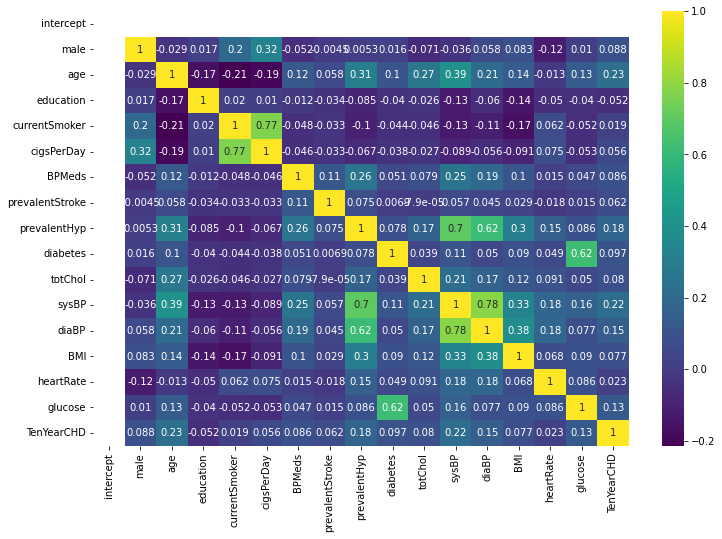

In [97]:
# Heatmap for correlation visualization
plt.figure(figsize=(12,8))
sns.heatmap(framingham_data.corr(),annot=True,cmap='viridis')
plt.show()

**Observations:**

Correlation plot shows insightful information about the relation within the attributes. It can Either be negative or positive or 0. We need to always keep one feature from two Strongly Correlated ones. This is important information since the Optimization Model we will be using in the analysis is assuming that the variables are independent from each other, so we will clean up the variables with a high correlation (keeping with one with higher predictive power)

currentSmoker & cigsPerDay has strong Correlation of 77 (Scaled for better Observations)
prevalentHyp vs sysBP / diaBP are having Positive Correlation of 70 and 62.
Glucose & diabetes are postively Correlated. (60)
sysBP & diaBP are also having Positive Correlation. (78)

**Removing factors**

Based on the results above and the correlation matrix, we will remove the following highly correlated attributes from the model: prevalentHyp, DiaBP, currentSmoker and diabetes

In [98]:
# Update dataframe
new_df = framingham_data[["intercept","male","age","education", "cigsPerDay", "BPMeds", "prevalentStroke", "totChol","sysBP", "BMI", "heartRate", "glucose", "TenYearCHD" ]]
new_df.head()

,intercept,male,age,education,cigsPerDay,BPMeds,prevalentStroke,totChol,sysBP,BMI,heartRate,glucose,TenYearCHD
0,1,1,-1.234805,4,-0.761525,0.0,0,-0.940823,-1.195766,0.286887,0.342713,-0.204733,0
1,1,0,-0.418208,2,-0.761525,0.0,0,0.296935,-0.515126,0.718365,1.590096,-0.247955,0
2,1,1,-0.184895,1,0.918536,0.0,0,0.184412,-0.220183,-0.112721,-0.073081,-0.507283,0
3,1,0,1.331643,3,1.758566,0.0,0,-0.265682,0.800777,0.681591,-0.904670,0.919023,1
4,1,0,-0.418208,3,1.170545,0.0,0,1.084599,-0.106743,-0.661875,0.758507,0.141038,0


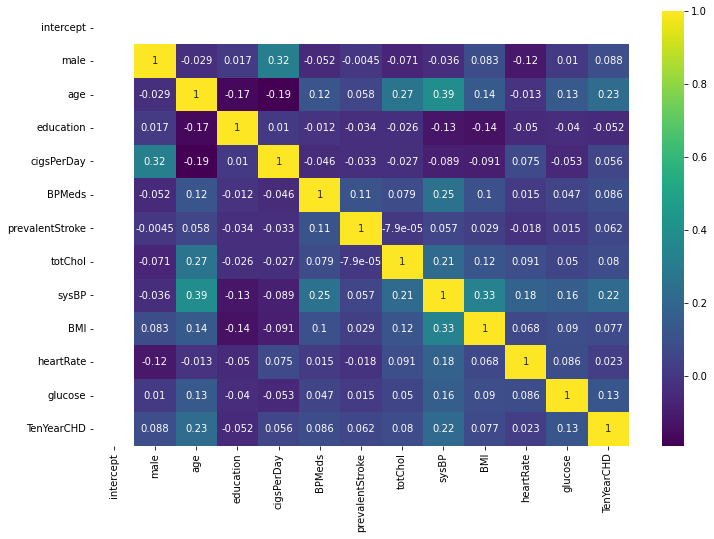

In [99]:
# Heatmap for correlation visualization once variables with high correlation are removed
plt.figure(figsize=(12,8))
sns.heatmap(new_df.corr(),annot=True,cmap='viridis')
plt.show()

In [100]:
np_fh_2 = np.array(new_df)

In [101]:
# Building the Logistic Regression model:
ind_var = np_fh_2[:, :-1]
dep_var = np_fh_2[:, -1]
log_reg = sm.Logit(dep_var, ind_var).fit()
log_reg.summary(xname=["intercept","male","age","education", "cigsPerDay", "BPMeds", "prevalentStroke", "totChol","sysBP", "BMI", "heartRate", "glucose"])

Optimization terminated successfully.
         Current function value: 0.379243
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 4238
Model:                          Logit   Df Residuals:                     4226
Method:                           MLE   Df Model:                           11
Date:                Tue, 20 Dec 2022   Pseudo R-squ.:                  0.1099
Time:                        09:48:16   Log-Likelihood:                -1607.2
converged:                       True   LL-Null:                       -1805.8
Covariance Type:            nonrobust   LLR p-value:                 2.543e-78
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
intercept          -2.1880      0.115    -18.983      0.000      -2.414      -1.962
male                0.5086      0.099      5.117      0.000       0.314       0.703
age                 0.5410      0.052     10.418      0.000       0.439       0.643
education          -0.0089      0.046     -0.193      0.847      -0.099       0.081
cigsPerDay          0.2516      0.046      5.412      0.000       0.160       0.343
BPMeds              0.2951      0.221      1.337      0.181      -0.137       0.728
prevalentStroke     0.9970      0.440      2.264      0.024       0.134       1.860
totChol             0.0731      0.046      1.599      0.110      -0.017       0.163
sysBP               0.3480      0.048      7.223      0.000       0.254       0.442
BMI                 0.0194      0.047      0.414      0.679      -0.072       0.111
heartRate          -0.0129      0.046     -0.277      0.782      -0.104       0.078
glucose             0.1750      0.038      4.639      0.000       0.101       0.249
===================================================================================
"""

In [102]:
# Backward elimination to drop insignificant variables one by one based on their p-score
X = new_df.drop(['TenYearCHD'], axis=1)
y = new_df['TenYearCHD']

cols = list(X.columns)
p = []
while len(cols)>1:
    X = X[cols]
    model= sm.Logit(y, X).fit().pvalues
    p =pd.Series(model.values[1:],index=X.columns[1:])
    pmax = max(p)
    pid = p.idxmax()
    if pmax>0.05:
        cols.remove(pid)
        print('Variable removed:', pid, pmax)
    else:
        break
cols   

Optimization terminated successfully.
         Current function value: 0.379243
         Iterations 7
Variable removed: education 0.846664369820175
Optimization terminated successfully.
         Current function value: 0.379247
         Iterations 7
Variable removed: heartRate 0.786639723415625
Optimization terminated successfully.
         Current function value: 0.379256
         Iterations 7
Variable removed: BMI 0.665986539843785
Optimization terminated successfully.
         Current function value: 0.379278
         Iterations 7
Variable removed: BPMeds 0.17492829263816445
Optimization terminated successfully.
         Current function value: 0.379490
         Iterations 7
Variable removed: totChol 0.10482091550366582
Optimization terminated successfully.
         Current function value: 0.379796
         Iterations 7


['intercept',
 'male',
 'age',
 'cigsPerDay',
 'prevalentStroke',
 'sysBP',
 'glucose']

**Removing non significant features based on p-value**

As we can see from the above table many features are not statistically significant and keeping those in our model can reduce the model’s precision. Therefore we will remove those features from the model and re-run the it.

We will remove education, BPmeds, totChol, heartRate and BMI from the model.

In [103]:
# create new df with attributes with high p-value removed

df_reduced = pd.DataFrame(framingham_data[cols])
df_reduced['TenYearCHD'] = framingham_data['TenYearCHD']
df_reduced.head()

,intercept,male,age,cigsPerDay,prevalentStroke,sysBP,glucose,TenYearCHD
0,1,1,-1.234805,-0.761525,0,-1.195766,-0.204733,0
1,1,0,-0.418208,-0.761525,0,-0.515126,-0.247955,0
2,1,1,-0.184895,0.918536,0,-0.220183,-0.507283,0
3,1,0,1.331643,1.758566,0,0.800777,0.919023,1
4,1,0,-0.418208,1.170545,0,-0.106743,0.141038,0


In [104]:
# conversion to numpy array
np_fh_3 = np.array(df_reduced)

In [105]:
# Building the Logistic Regression model:
ind_var = np_fh_3[:, :-1]
dep_var = np_fh_3[:, -1]
log_reg = sm.Logit(dep_var, ind_var).fit()
log_reg.summary(xname=cols)

Optimization terminated successfully.
         Current function value: 0.379796
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 4238
Model:                          Logit   Df Residuals:                     4231
Method:                           MLE   Df Model:                            6
Date:                Tue, 20 Dec 2022   Pseudo R-squ.:                  0.1087
Time:                        09:48:18   Log-Likelihood:                -1609.6
converged:                       True   LL-Null:                       -1805.8
Covariance Type:            nonrobust   LLR p-value:                 1.205e-81
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
intercept          -2.1823      0.072    -30.488      0.000      -2.323      -2.042
male                0.4886      0.097      5.027      0.000       0.298       0.679
age                 0.5526      0.051     10.876      0.000       0.453       0.652
cigsPerDay          0.2504      0.046      5.460      0.000       0.161       0.340
prevalentStroke     1.0529      0.436      2.413      0.016       0.198       1.908
sysBP               0.3729      0.044      8.448      0.000       0.286       0.459
glucose             0.1749      0.037      4.676      0.000       0.102       0.248
===================================================================================
"""

This cleaned up dataframe now only consists of attributes with a low p-value which have a significant impact on the predictor variable.

## 5. Prediction ## 

In [106]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,roc_curve, roc_auc_score, precision_score, recall_score, precision_recall_curve
from sklearn.metrics import f1_score, classification_report

### Logistic regression (Default) ###

In [107]:
# Separate Dependent and Independent Variables
X = df_reduced.drop(['TenYearCHD'], axis=1)
y = df_reduced['TenYearCHD']
X.head()

,intercept,male,age,cigsPerDay,prevalentStroke,sysBP,glucose
0,1,1,-1.234805,-0.761525,0,-1.195766,-0.204733
1,1,0,-0.418208,-0.761525,0,-0.515126,-0.247955
2,1,1,-0.184895,0.918536,0,-0.220183,-0.507283
3,1,0,1.331643,1.758566,0,0.800777,0.919023
4,1,0,-0.418208,1.170545,0,-0.106743,0.141038


In [108]:
# Split data in training and test data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [109]:
logreg = LogisticRegression(solver='liblinear', fit_intercept=True) 

logreg.fit(X_train, y_train)

y_prob_train = logreg.predict_proba(X_train)[:,1]
y_pred_train = logreg.predict (X_train)

print('Confusion Matrix - Train: ', '\n', confusion_matrix(y_train, y_pred_train))
print('\nOverall accuracy - Train: ', accuracy_score(y_train, y_pred_train))


y_prob = logreg.predict_proba(X_test)[:,1]
y_pred = logreg.predict (X_test)

# performance
print('\nConfusion Matrix - Test: ','\n', confusion_matrix(y_test, y_pred))
print('\nOverall accuracy - Test: ','\n', accuracy_score(y_test, y_pred))
print('\nClassification report for test:\n',classification_report(y_test,y_pred))
print(f'Area Under Curve: {roc_auc_score(y_test, y_pred)}')
print(f'Recall score: {recall_score(y_test,y_pred)}')

Confusion Matrix - Train:  
 [[2843   18]
 [ 483   46]]

Overall accuracy - Train:  0.852212389380531

Confusion Matrix - Test:  
 [[726   7]
 [108   7]]

Overall accuracy - Test:  
 0.8643867924528302

Classification report for test:
               precision    recall  f1-score   support

           0       0.87      0.99      0.93       733
           1       0.50      0.06      0.11       115

    accuracy                           0.86       848
   macro avg       0.69      0.53      0.52       848
weighted avg       0.82      0.86      0.82       848

Area Under Curve: 0.5256598849279317
Recall score: 0.06086956521739131


**Conclusion**
- Since the F1-score for 1 is close to 0 even though for 0 is 0.93, the model cannot be accepted. Hence the imbalance in the data should be treated since
- We need to lower the high number of Type 2 errors from the prediction since this would mean that patient with a risk of developing a coronary heart disease are not being identified. We may accept higher Type 1 error rather than a higher Type 2 error.

### Weighted Logistic Regression ###

In case of unbalanced label distribution, the best practice for weights is to use the inverse of the label distribution. In our set, label distribution is 1:5.6 so we can specify weights as inverse of label distribution. For the majority class (people have no TenYearCHD), will use weight of 1 and for minority class, will use weight of 5.6. So the penalty of wrong prediction of minority class would be 5.6 times more severe than wrong prediction of majority class. Moreover, with this class-weight values, we would expect our model to perform better then the default one i.e. previous model.

In [110]:
# define class weights
w = {0:1, 1:5.6}
# define model
lg2 = LogisticRegression(random_state=13, class_weight=w)
# fit it
lg2.fit(X_train,y_train)
# test
y_pred = lg2.predict(X_test)
# performance
print(f'Accuracy Score: {accuracy_score(y_test,y_pred)}')
print(f'Area Under Curve: {roc_auc_score(y_test, y_pred)}')
print(f'Recall score: {recall_score(y_test,y_pred)}')

Accuracy Score: 0.6792452830188679
Area Under Curve: 0.6934930897443502
Recall score: 0.7130434782608696


In [111]:
pd.DataFrame(confusion_matrix(y_test, y_pred), columns=['Predicted No', 'Predicted Yes'], index = ['Actual No', 'Actual Yes'])

,Predicted No,Predicted Yes
Actual No,494,239
Actual Yes,33,82


With weighted-LG, Area-Under-Curve (AUC) increased from 0.52 to 0.68. Recall score improved from 0.026 to 0.7. Correct predictions for minority label increased as well. Though the model has now more wrong prediction in majority class, we are okay with that trade-off to reduce the number of cases where a risk for heart disease is not detected.

## 6. Conclusion ##

**We used Logit model to assess the likelihood of a person to develop a Coronary Heart Disease using the Framingham Data set. In the project, we explored the data, cleaned it up using linear regression to impute missing values, used regplots, and heatmaps to visualize the data, and finally used Logit to train a model to predict whether a person is likely to develop Corornary Heart Disease in the next ten years.**

**In the implementation of the Logit model, we engineered the features to eliminate highly correlated covariates and those with high P-values. To improve the model further, we used a weighted Logistic Regression to overcome the imbalance in the original dataset. The accuracy of the model was between 0.6 and 0.7.**

**It may be concluded that though the covariates in the dataset have some predictive value, the risk of development of a Coronary Heart disease in the next ten years may be depending also on factors not available in the dataset, like genetic predisposition.**